# Project Outline


## 0. Imports and random state

In [11]:

from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

my_random_state = 69  # (:


## 1. Team
- Itmam Alam
- Akos Papp


## 2. Data
1. Link to dataset(s)
[https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success]()
2. Download the necessary files, describe the attributes in the notebook including classes/labels

Features
| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
| --- | --- | --- | --- | --- | --- | --- |
| Marital Status | Feature | Integer | Marital Status | 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |     | no  |
| Application mode | Feature | Integer |     | 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International) |     | no  |
| Application order | Feature | Integer |     | Application order (between 0 - first choice; and 9 last choice) |     | no  |
| Course | Feature | Integer |     | 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance) |     | no  |
| Daytime/evening attendance | Feature | Integer |     | 1 – daytime 0 - evening |     | no  |
| Previous qualification | Feature | Integer | Education Level | 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |     | no  |
| Previous qualification (grade) | Feature | Continuous |     | Grade of previous qualification (between 0 and 200) |     | no  |
| Nacionality | Feature | Integer | Nationality | 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian |     | no  |
| Mother's qualification | Feature | Integer | Education Level | 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |     | no  |
| Father's qualification | Feature | Integer | Education Level | 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |     | no  |
| Mother's occupation | Feature | Integer | Occupation | 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |     | no  |
| Father's occupation | Feature | Integer | Occupation | 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |     | no  |
| Admission grade | Feature | Continuous |     | Admission grade (between 0 and 200) |     | no  |
| Displaced | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Educational special needs | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Debtor | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Tuition fees up to date | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Gender | Feature | Integer | Gender | 1 – male 0 – female |     | no  |
| Scholarship holder | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Age at enrollment | Feature | Integer | Age | Age of studend at enrollment |     | no  |
| International | Feature | Integer |     | 1 – yes 0 – no |     | no  |
| Curricular units 1st sem (credited) | Feature | Integer |     | Number of curricular units credited in the 1st semester |     | no  |
| Curricular units 1st sem (enrolled) | Feature | Integer |     | Number of curricular units enrolled in the 1st semester |     | no  |
| Curricular units 1st sem (evaluations) | Feature | Integer |     | Number of evaluations to curricular units in the 1st semester |     | no  |
| Curricular units 1st sem (approved) | Feature | Integer |     | Number of curricular units approved in the 1st semester |     | no  |
| Curricular units 1st sem (grade) | Feature | Integer |     | Grade average in the 1st semester (between 0 and 20) |     | no  |
| Curricular units 1st sem (without evaluations) | Feature | Integer |     | Number of curricular units without evalutions in the 1st semester |     | no  |
| Curricular units 2nd sem (credited) | Feature | Integer |     | Number of curricular units credited in the 2nd semester |     | no  |
| Curricular units 2nd sem (enrolled) | Feature | Integer |     | Number of curricular units enrolled in the 2nd semester |     | no  |
| Curricular units 2nd sem (evaluations) | Feature | Integer |     | Number of evaluations to curricular units in the 2nd semester |     | no  |
| Curricular units 2nd sem (approved) | Feature | Integer |     | Number of curricular units approved in the 2nd semester |     | no  |
| Curricular units 2nd sem (grade) | Feature | Integer |     | Grade average in the 2nd semester (between 0 and 20) |     | no  |
| Curricular units 2nd sem (without evaluations) | Feature | Integer |     | Number of curricular units without evalutions in the 1st semester |     | no  |
| Unemployment rate | Feature | Continuous |     | Unemployment rate (%) |     | no  |
| Inflation rate | Feature | Continuous |     | Inflation rate (%) |     | no  |
| GDP | Feature | Continuous |     | GDP |     | no  |
| Target | Target | Categorical |     | Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course |     | no  |

In [12]:
data = pd.read_csv('data.csv', sep=';')

X = data[data.columns[:-1]]
Y = data['Target']


3. Initial standard analysis with `sample`, `head`, `info`, `describe` (and `unique` values where appropriate!)

In [13]:
print("info")
print(data.info())
print("head")
print(data.head())
print("sample")
print(data.sample())
print("describe")
print(data.describe())

for col in data.columns:
    print(f"unique values in {col}")
    print(data[col].unique())

# Display the first few rows of X and Y
print("\nFirst 5 rows of X:")
print(X[:5])

print("\nFirst 5 rows of Y:")
print(Y[:5])

# Display information about the features (X)
print("\nShape of X:")
print(X.shape)

# Display unique values for the target (Y)
print("\nUnique values in Y:")
print(np.unique(Y, return_counts=True))

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification              

## 3. Data Visualization
1. 4 different types of plots (correlation, histograms, etc.) including discussion
2. Data imbalance discussion with graphic

Effect of Economic factors like GDP and Inflation rate.  
According to the jointplot the economic factors heavily influence a students success.

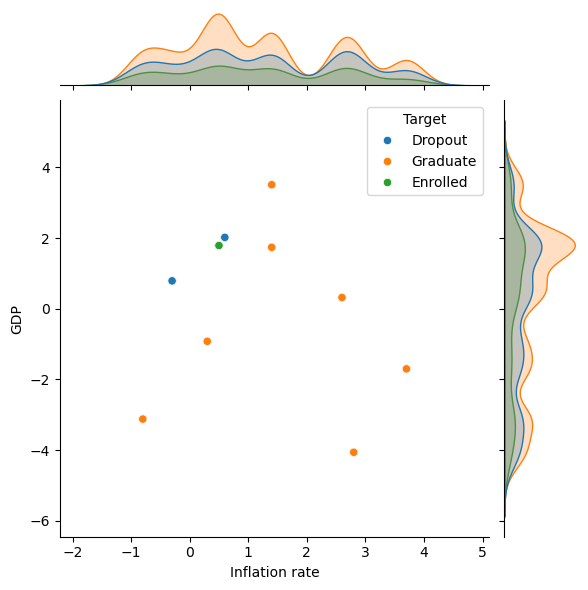

In [14]:
sns.jointplot(data=data, x='Inflation rate', y='GDP', hue='Target')

There is a large imbalance in the Date.
about 50% of studens Graduate while 30% are Dropouts and 20% are enrolled.

<Axes: ylabel='count'>

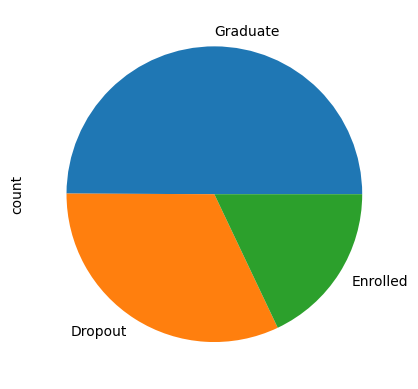

In [15]:
data['Target'].value_counts().plot(kind='pie')

## 4. Data Cleaning (if necessary, otherwise leave empty but justified)

According to the data source, lots of data cleaning and preperation was performed.  
Also they removed any unexplainable outliers.

1. Incorrect values  
    I am unable to check if the values are incorrect.
2. Missing values  
    according to the initial analysis there are no missing values.
3. Justified feature reduction or type conversion  
    I don't have any reason to remove features.
4. Save the - if necessary - merged and integrated files from various sources into `korr.csv`  
    Not necessary - No changes were made.

## 5. Data Preparation
1. Different pipelines per algorithm (SVM, DT, RF, kNN, Logistic Regression) including splitting into train-validation sets with stratification

At this point a preprocessor would not be recuired, because all the data has already been preprocessed (as the initial analysis suggests).
I will add a preprocessor anyway in case I still need in in the future. 

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
    ],
    remainder='passthrough'  # This is important, see above!
)

test preprocessor

In [17]:
pd.DataFrame(preprocessor.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,1.0,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,1.0,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,1.0,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [18]:
# kNN
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('scaler', RobustScaler()),
        ('knn', KNeighborsClassifier())
    ]
)

knn_param_grid = [{'knn__n_neighbors': range(1, 30),
                   'knn__weights': ['uniform', 'distance'],
                   'knn__metric': ['euclidean', 'manhattan']}]

grid_search = GridSearchCV(
    estimator=pipeline, param_grid=knn_param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, Y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
0.719705754531278


In [ ]:
# SVM
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("scaler", RobustScaler()),
        ("svm", SVC(random_state=my_random_state))
    ]
)

svm_param_grid = {'svm__C': [0.1, 1, 10, 100, 1000],
                  'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'svm__kernel': ['rbf', 'linear']}

grid_search = GridSearchCV(pipeline, svm_param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, Y)

print(grid_search.best_params_)
print(grid_search.best_score_)

In [1]:
# RF


pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(random_state=my_random_state))
    ]
)

rf_param_grid = {'rf__criterion': ['gini', 'entropy'],
                 'rf__max_depth': range(1, 20),
                 'rf__min_samples_leaf': range(1, 20)}

grid_search = GridSearchCV(pipeline, rf_param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, Y)

print(grid_search.best_params_)
print(grid_search.best_score_)

NameError: name 'Pipeline' is not defined

In [ ]:
# Logistic Regression
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("scaler", RobustScaler()),
        ("logreg", LogisticRegression(random_state=my_random_state))
    ]
)
LogisticRegression


svm_param_grid = {
    "penalty": {'l1', 'l2', 'elasticnet', None},
    "dual": {True, False},
    "fit_intercept": {True, False},
}

grid_search = GridSearchCV(pipeline, svm_param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, Y)

print(grid_search.best_params_)
print(grid_search.best_score_)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'accuracy', 'neg_root_mean_squared_log_error', 'positive_likelihood_ratio', 'precision_samples', 'precision_micro', 'neg_mean_absolute_error', 'roc_auc_ovo_weighted', 'roc_auc_ovr_weighted', 'precision', 'neg_mean_gamma_deviance', 'f1_samples', 'jaccard_samples', 'jaccard_macro', 'recall_samples', 'homogeneity_score', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'roc_auc', 'rand_score', 'recall', 'top_k_accuracy', 'd2_absolute_error_score', 'f1_micro', 'recall_micro', 'neg_log_loss', 'f1_macro', 'neg_max_error', 'neg_mean_absolute_percentage_error', 'adjusted_mutual_info_score', 'jaccard_weighted', 'neg_negative_likelihood_ratio', 'balanced_accuracy', 'precision_weighted', 'precision_macro', 'jaccard_micro', 'adjusted_rand_score', 'r2', 'roc_auc_ovo', 'explained_variance', 'f1_weighted', 'neg_mean_poisson_deviance', 'normalized_mutual_info_score', 'recall_weighted', 'neg_median_absolute_error', 'recall_macro', 'roc_auc_ovr', 'neg_brier_score', 'average_precision', 'jaccard', 'matthews_corrcoef', 'v_measure_score', 'mutual_info_score', 'neg_root_mean_squared_error', 'fowlkes_mallows_score', 'f1', 'completeness_score'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'Accuracy' instead.

In [ ]:
# DT
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('dt', DecisionTreeClassifier(random_state=my_random_state))
    ]
)

dt_param_grid = [{'dt__criterion': ['gini', 'entropy'],
                  'dt__max_depth': range(1, 20),
                  'dt__min_samples_leaf': range(1, 20)}]

grid_search = GridSearchCV(pipeline, dt_param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, Y)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'dt__criterion': 'entropy', 'dt__max_depth': 7, 'dt__min_samples_leaf': 4}
0.7502216427640156


## 6. Comparison of Classification Algorithms
1. Hyperparameter optimization using GridSearch per algorithm with `cv=5` including time measurement (total time per algorithm must be < 15 min)
2. Discussion of the optimized final models
   1. Show decision surface – see [Data Science Crash Course - Chapter 7](https://data-science-crashkurs.de/chapters/kapitel_07.html#id2)
   2. Performance comparison table using Accuracy, F1, Precision, Recall, MCC on validation data
   3. If only 2 classes, then also include Confusion Matrix with discussion